Title Page / Header Cell 

Module: CT7201 Python Notebooks and Scripting 

Assignment Title: Earthquake Data Analysis Using Python Scripting (2023 Global Dataset) 

Student Names & IDs 

Date of submission 

Tutor Name 


Executive Summary (Short Overview) 

A single short paragraph that explains: 

What the project does 

What the dataset contains 

What analyses and models you will build 

The purpose of your Python scripting/OOP 

The key findings (a preview) 

Introduction 

Explain: 

Why we analyse earthquakes 

Why Python scripting is appropriate 

The importance of visualisation, functions, and clean coding 

A short explanation of what will be done in the notebook 

Dataset Description 

Cover: 

Source: USGS Earthquake Hazards Program 

Scope: Global events in 2023 

Number of records and variables 

Key fields (time, magnitude, depth, location, errors, network) 

Why this dataset is suitable for scripting and analysis 

Project Objectives 

Write them cleanly and academically: 

Load, clean, and prepare the earthquake dataset using Python scripting. 

Implement functions and modular code to automate analysis steps. 

Perform univariate, bivariate, and multivariate analysis. 

Produce clear and readable visualisations using matplotlib/seaborn. 

Implement a 3D visualisation using Python libraries. 

Build a simple machine learning model (classification or clustering). 

Demonstrate good programming practice, clarity, modularity, and documentation. 

 Methodology 

A clear step-by-step description of the workflow: 

Import libraries 

Load raw CSV 

Clean data and handle missing values 

Engineer additional features 

Perform exploratory analysis (EDA) 

Build visualisations 

Train and evaluate a simple ML model 

Interpret outputs 

Conclude findings 

Python Scripting & Functions Section 

CT7201 marks heavily focus on scripting. 

You MUST: 

✔ Create multiple custom Python functions: 

load_data() 

clean_data() 

engineer_features() 

plot_magnitude_distribution() 

plot_depth_boxplot() 

calculate_correlations() 

build_classifier() 

plot_3D_scatter() 

✔ Use: 

docstrings 

comments 

parameters 

return values 

✔ Avoid: 

long messy code cells 

repeating the same code 

In [48]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# load the raw csv file
#Dan

eq_df = pd.read_csv ('earthquake_dataset.csv')
eq_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [50]:
eq_df.describe()
#Dan

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,26642.000000,26642.000000,26642.000000,26642.000000,25227.000000,25225.000000,24776.000000,26642.000000,25093.000000,26642.000000,24970.000000,25065.000000
mean,16.852798,-11.487497,67.491224,4.007395,42.571332,124.930971,2.692908,0.581575,7.017267,4.475056,0.122735,33.315939
std,30.389200,130.053399,116.762456,0.794423,37.662352,67.430145,4.043568,0.256276,4.072365,4.451649,0.102271,48.022567
min,-65.849700,-179.998700,-3.370000,2.600000,0.000000,8.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,-6.415275,-149.608650,10.000000,3.220000,19.000000,73.000000,0.612000,0.410000,4.140000,1.848000,0.080000,10.000000
50%,18.884167,-64.811833,21.998000,4.300000,30.000000,111.000000,1.579000,0.590000,7.060000,2.019000,0.111000,18.000000
75%,41.827950,126.965100,66.833000,4.500000,52.000000,165.000000,3.172000,0.750000,9.730000,6.669000,0.150000,36.000000
max,86.593900,179.999400,681.238000,7.800000,423.000000,350.000000,50.820000,1.880000,99.000000,60.670000,4.490000,884.000000


In [51]:
eq_df.info()
#Dan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

In [52]:
# check maximum depth value
eq_df["depth"].max()

681.238

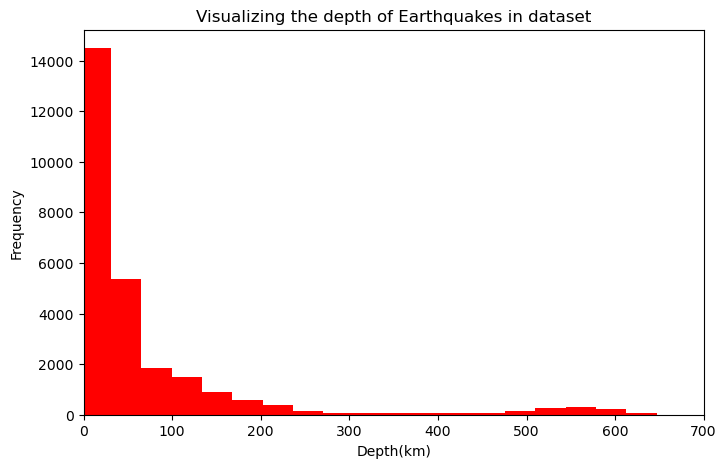

In [53]:
#use histogram to visualize the depth
plt.figure(figsize=(8,5))

plt.hist(eq_df['depth'], bins=20, color='red')
plt.xlim(0,700)
plt.title('Visualizing the depth of Earthquakes in dataset')
plt.xlabel('Depth(km)')
plt.ylabel('Frequency')
plt.show()

Shows all Earthquakes falling under the maximum of 700km

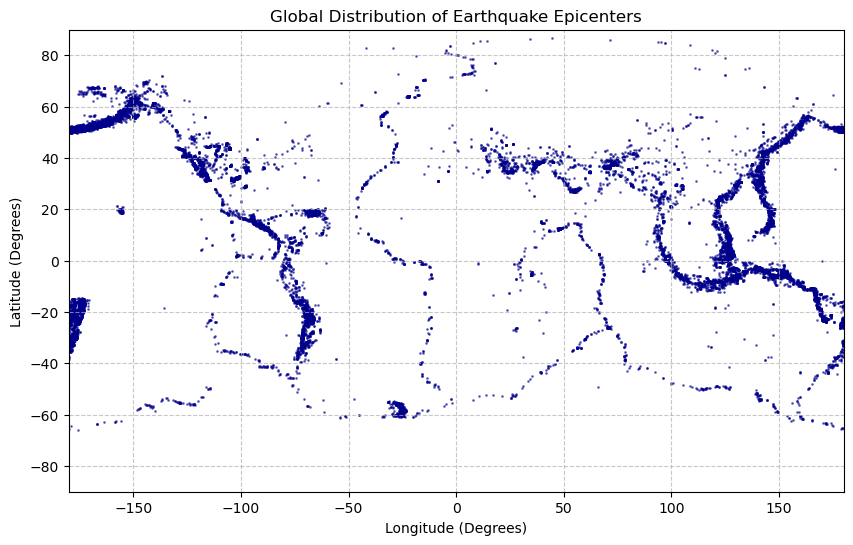

In [54]:
#Plotting a distribution of Earthquake epicentres
plt.figure(figsize=(10, 6))
plt.scatter(eq_df['longitude'], eq_df['latitude'], s=1, alpha=0.5, c='darkblue')

plt.xlim(-180, 180)
plt.ylim(-90, 90)

plt.title('Global Distribution of Earthquake Epicenters')
plt.xlabel('Longitude (Degrees)')
plt.ylabel('Latitude (Degrees)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('epicentre_scatter.png')

plt.show()
plt.close()

Visualisation to show all resords falling between the longitude and latitude ranges.

In [55]:
#finding the distribution of type of event
type_counts = eq_df['type'].value_counts()
print(type_counts)

type
earthquake           26428
mining explosion       167
ice quake               26
volcanic eruption       13
explosion                3
quarry blast             2
Landslide                2
landslide                1
Name: count, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'earthquake'),
  Text(1, 0, 'mining explosion'),
  Text(2, 0, 'ice quake'),
  Text(3, 0, 'volcanic eruption'),
  Text(4, 0, 'explosion'),
  Text(5, 0, 'quarry blast'),
  Text(6, 0, 'Landslide'),
  Text(7, 0, 'landslide')])

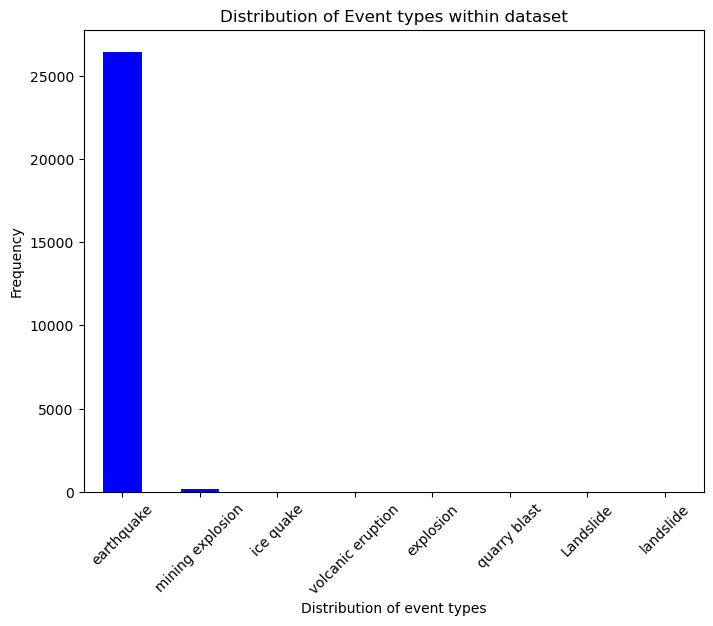

In [56]:
plt.figure(figsize=(8,6))
ax = type_counts.plot(kind='bar', color = 'blue')
plt.title('Distribution of Event types within dataset')
plt.xlabel('Distribution of event types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


The dataset predominantly holds data for earthquakes globally.  However, some of the held data refers to other disasters such as mining explosions and ice quakes.  In order to focus this analysis on earthquake prediction, the other disasters will need to be filtered out as a part of the cleaning process.

In [57]:
# show individual functions in these blocks
#load_data():


## 3.0 Data Cleaning

Reliable analysis begins with a dataset that is complete, consistent and physically meaningful. Earthquake data is particularly sensitive to measurement quality. Small errors in magnitude, depth, time or location can distort global patterns and weaken any statistical conclusions. For this reason, a structured and domain-appropriate cleaning pipeline was applied to the 2023 global earthquake dataset to ensure that every event used in this project is valid, accurate and suitable for analysis.

The dataset provided by the USGS is generally well structured, but still contains a number of issues that must be addressed before performing meaningful analysis. These include occasional fully duplicated rows, multiple versions of the same earthquake (with earlier records containing outdated measurements), a small number of values that fall outside physically realistic ranges and non earthquieke type explotions. The aim of the cleaning process is not to remove large portions of the data or introduce unnecessary filtering, but simply to correct errors and ensure that each earthquake record is scientifically reasonable.

The cleaning pipeline used in this project consists of the following key steps:

**1. Work on a copy of the data**  
A fresh copy of the dataset is created to protect the original raw data. This avoids accidental modifications and preserves the integrity of the input file.

**2. Remove exact duplicate records**  
Fully duplicated rows occasionally appear in exported or merged datasets. These provide no new information and would artificially inflate earthquake counts if left in place. All exact duplicates were removed.

**3. Remove duplicate earthquake identifiers, keeping only the most recent update**  
The `id` field uniquely identifies each earthquake. In some cases, the same event appears more than once because the USGS updates its magnitude, depth or location as new sensor data arrives. The dataset was sorted by the `updated` timestamp, ensuring that only the most recent and most accurate version of each event is retained.

It is important to note that repeated `id` values do not represent different “stages” of an earthquake. Earthquakes do not physically change in magnitude or depth over time. Multiple entries simply reflect measurement corrections by the seismic network. Therefore, retaining only the latest updated version ensures analytical accuracy.

**4. Convert time fields into proper datetime format**  
The `time` and `updated` columns were converted from text into real datetime objects. This step is required for all time-based analysis such as monthly grouping, temporal visualisation and event ordering.

**5. Ensure core numeric fields are numeric and remove missing essential values**
The core physical attributes of each earthquake latitude, longitude, depth and magnitude must be stored as numbers.These columns were converted to numeric values using errors="coerce", which safely transforms invalid entries (e.g., text or corrupted values) into NaN. Rows missing any of these essential fields were removed, as they cannot be displayed on maps or used in magnitude/depth analysis. The 2023 dataset is generally complete, so this step removed only a very small number of invalid rows.

**6. Remove rows missing essential physical attributes**  
Every earthquake must have a valid `time`, `latitude`, `longitude`, `depth` and `mag`. 
Without these, the event cannot be plotted, positioned geographically, or included in magnitude or depth analysis. Any rows missing these core fields were removed. The 2023 dataset is highly complete, so no events were lost at this stage.

**7. Apply geophysical validity checks**  
Basic physical constraints were enforced to ensure that all retained records represent real, possible earthquakes. These checks include:
- Latitude within −90 to 90 degrees  
- Longitude within −180 to 180 degrees  
- The deepest earthquake in the dataset occurred at 681 km, which is within the scientifically known maximum depth for natural earthquakes (∼700 km). For this reason, depth values were restricted to the range 0–700 km to remove impossible values while keeping all real deep-focus events
- Magnitude within the realistic range of 0 to 10
Any record falling outside these limits was removed, as such values reflect data errors rather than genuine seismic activity.

**8. Keep only real earthquakes (remove explosions and other event types)**
The dataset includes different types of seismic events, such as quarry blasts, mining explosions, ice quakes and testing activity.These are not natural earthquakes and would distort global patterns.Only rows where type == "earthquake" were retained.

Non-essential fields such as `gap`, `dmin`, `nst`, `horizontalError`, `magError` and 
`place` contain some missing values, but these do not prevent spatial or statistical analysis. Removing rows based on these optional metadata fields would unnecessarily reduce the dataset and bias the analysis toward only well-recorded earthquakes
These fields were therefore kept as they are.

In [58]:
#Hasini
def clean_data(df):
    df = df.copy() # work on a copy to avoid modifying the original dataframe

    # Remove rows which are completely duplicated
    original_rows = len(df)
    df = df.drop_duplicates()
    print(f"Removed {original_rows - len(df)} exact duplicate rows.")

     # Convert 'time' and 'updated' columns to datetime
    df["time"] = pd.to_datetime(df["time"], errors="coerce")
    df["updated"] = pd.to_datetime(df["updated"], errors="coerce")

    # If the same earthquake ID appears more than once, keep the most recently added entry)
    rows_before_id_clean = len(df)
    df = (
        df.sort_values("updated") # oldest to newest
        .drop_duplicates(subset="id", keep="last")
    )
    print(f"Removed {rows_before_id_clean - len(df)} rows with duplicate earthquake based on IDs.")

    # Make sure the core numerical columns are actually numbers
    for col in ["latitude", "longitude", "depth", "mag"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Drop rows missing essential earthquake information
    essential_cols = ["time", "latitude", "longitude", "depth", "mag"]
    rows_before_essential_clean = len(df)
    df = df.dropna(subset=essential_cols)
    print(f"Removed {rows_before_essential_clean - len(df)} rows with missing essential earthquake information in {essential_cols}.")

    # Keep only valid geographical ranges
    rows_before_ranges = len(df)

    valid_lat = df["latitude"].between(-90, 90)
    valid_lon = df["longitude"].between(-180, 180)
    valid_depth = df["depth"].between(0, 700)
    valid_mag = df["mag"].between(0, 10)

    df = df[valid_lat & valid_lon & valid_depth & valid_mag]
    print(f"Removed {rows_before_ranges - len(df)} rows with invalid geographical ranges.")

    #keep only type 'earthquake'
    if 'type' in df.columns:
        rows_before_type_clean = len(df)
        df = df[df["type"] == "earthquake"]
        print(f"Removed {rows_before_type_clean - len(df)} non earthquake events.")

    return df

In [59]:
#Clean the dataset and check how its shape and structure change after cleaning.
#Hasini
print("Raw dataset shape:", eq_df.shape)

cleaned_eq_df = clean_data(eq_df)

print("Cleaned dataset shape:", cleaned_eq_df.shape)
cleaned_eq_df.info()
cleaned_eq_df.head()

Raw dataset shape: (26642, 22)
Removed 1960 exact duplicate rows.
Removed 0 rows with duplicate earthquake based on IDs.
Removed 0 rows with missing essential earthquake information in ['time', 'latitude', 'longitude', 'depth', 'mag'].
Removed 43 rows with invalid geographical ranges.
Removed 207 non earthquake events.
Cleaned dataset shape: (24432, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 24432 entries, 19 to 18434
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             24432 non-null  datetime64[ns, UTC]
 1   latitude         24432 non-null  float64            
 2   longitude        24432 non-null  float64            
 3   depth            24432 non-null  float64            
 4   mag              24432 non-null  float64            
 5   magType          24432 non-null  object             
 6   nst              23051 non-null  float64            
 7   gap         

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
19,2023-01-01 09:04:40.710000+00:00,17.830333,-65.985500,10.92,2.78,md,8.0,245.0,0.177300,0.14,...,2023-01-01 09:28:26.140000+00:00,"16 km S of Lamboglia, Puerto Rico",earthquake,0.87,0.63,0.126663,7.0,reviewed,pr,pr
22,2023-01-01 10:09:37.830000+00:00,18.206500,-67.117333,21.88,2.95,md,26.0,97.0,0.005188,0.13,...,2023-01-01 11:14:15.230000+00:00,"2 km ENE of Mayagüez, Puerto Rico",earthquake,0.27,0.40,0.185128,10.0,reviewed,pr,pr
53,2023-01-01 23:56:53.930000+00:00,19.360100,-65.725600,34.00,3.62,md,14.0,270.0,1.110400,0.44,...,2023-01-02 00:32:06.212000+00:00,"103 km N of Suárez, Puerto Rico",earthquake,3.64,25.85,0.080000,4.0,reviewed,pr,pr
65,2023-01-02 04:15:00.130000+00:00,17.947833,-66.908500,12.69,2.80,md,22.0,192.0,0.038830,0.13,...,2023-01-02 05:22:04.140000+00:00,Puerto Rico region,earthquake,0.34,0.28,0.096839,16.0,reviewed,pr,pr
79,2023-01-02 06:56:51.300000+00:00,17.946333,-67.008500,10.55,2.88,md,5.0,230.0,0.113300,0.17,...,2023-01-02 08:25:00.790000+00:00,"5 km SE of La Parguera, Puerto Rico",earthquake,1.27,0.82,0.104091,5.0,reviewed,pr,pr


Overall, The cleaning steps removed duplicates, outdated entries, invalid coordinates, impossible depths, magnitudes and non-earthquake events—while preserving all scientifically valid measurements. No rows were removed due to missing essential fields, confirming that the dataset is generally complete.

The final cleaned dataset is accurate, complete, and suitable for the exploratory analysis and machine-learning model presented later in this project. Importantly, the global structure of the data has been preserved, which is essential for analysing worldwide earthquake behaviour in 2023.

## 4.0 Feature Engineering

The cleaned 2023 USGS earthquake dataset (`cleaned_eq_df`) contains a physically consistent set of global earthquake events: valid latitude/longitude, non-negative depth, and realistic magnitude. The epicentre map from Section 3 showed events clustered along major tectonic plate boundaries, indicating the cleaning pipeline removed spurious measurements.

Clean data is not automatically analytically useful. Several fields are too raw for interpretation or modelling:
- `time` is a precise timestamp, not calendar components.
- Depth is in km, while seismologists reason in shallow/intermediate/deep.
- Magnitude is continuous; communication uses descriptors (moderate, strong, major).
- Latitude/longitude are exact but don’t directly compare regions (e.g., Americas vs Asia–Pacific).
- Data quality is spread across uncertainty fields (`gap`, `rms`, `depthError`, `magError`, `horizontalError`), not directly comparable.

Implementation guardrails:
- Leakage guard: If you later predict magnitude or depth, drop `mag_category`, `depth_category`, and `energy_log10_J` from training features to avoid label leakage.
- Missing-data policy: Timestamps are coerced to UTC; failed parses become `NaT`. Uncertainty fields may remain `NaN`; downstream models should impute or filter using `quality_score`.

We perform feature engineering: systematic transformations of raw measurements into higher-level variables useful to humans and algorithms. Engineered features are grouped into four concepts:
1) Temporal — when earthquakes occur  
2) Physical severity — how strong or deep they are  
3) Geographical context — where they occur in broad global terms  
4) Data quality — how reliable the measurements are  

All transformations live in `engineer_features()`. It takes `cleaned_eq_df` and returns `featured_eq_df` with the same rows but richer columns capturing temporal patterns, physical severity, spatial context, and measurement quality. This engineered view underpins Section 5 (exploration) and Section 6 (modelling).


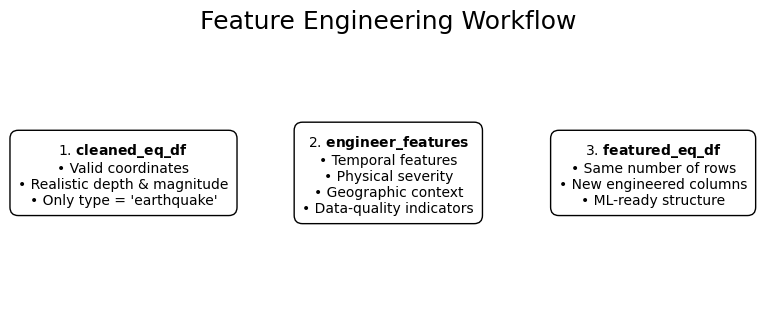

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 3.2))
ax.axis("off")

def box(x, n, text):
    ax.text(
        x, 0.5, f"{n}. {text}",
        ha="center", va="center",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.6", fc="white", ec="black"),
    )

box(0.15, 1,
    r"$\bf{cleaned\_eq\_df}$" + "\n"
    "• Valid coordinates\n"
    "• Realistic depth & magnitude\n"
    "• Only type = 'earthquake'")
box(0.50, 2,
    r"$\bf{engineer\_features}$" + "\n"
    "• Temporal features\n"
    "• Physical severity\n"
    "• Geographic context\n"
    "• Data-quality indicators")
box(0.85, 3,
    r"$\bf{featured\_eq\_df}$" + "\n"
    "• Same number of rows\n"
    "• New engineered columns\n"
    "• ML-ready structure")


plt.title("Feature Engineering Workflow", fontsize=18, pad=15)
plt.tight_layout()
plt.show()


*Figure: cleaned catalogue → single `engineer_features()` pass → enriched `featured_eq_df` (same rows, richer columns: temporal, physical, spatial, quality). Re-run `engineer_features()` on any updated catalogue to regenerate an identical feature layer for comparability across years.*

### 4.1 Design of the `engineer_features()` Function

Principles:
1) Domain interpretability — features reflect seismology concepts (depth classes, magnitude labels, tectonic regions).  
2) Reproducibility/modularity — one function regenerates the full feature set consistently.

#### 4.1.1 Temporal Features — When Earthquakes Occur
- `year`, `month`, `month_name`
- `day`, `day_of_week`, `day_name`
- `hour`, `part_of_day` (night/morning/afternoon/evening)
- `is_weekend`
- `season`

#### 4.1.2 Physical Severity Features — How Strong or Deep
- `depth_category`: shallow (0–70 km), intermediate (70–300 km), deep (300–700 km)
- `mag_category`: minor, light, moderate, strong, major, great, massive
- `is_strong_quake`: mag ≥ 6.0
- `energy_log10_J`: log energy proxy (Gutenberg–Richter)

Depth bins follow the standard shallow/intermediate/deep convention. Magnitude bins mirror common communication labels. Small shifts to edges don’t materially change patterns; adjust if a modelling task needs different cut points.

#### 4.1.3 Geographical Context Features — Where Earthquakes Occur
- `abs_latitude`, `abs_longitude`
- `distance_from_equator_km`, `distance_from_prime_meridian_km`
- `hemisphere_NS`, `hemisphere_EW`
- `broad_region`: Americas, Europe–Africa, Asia–Pacific, Oceania

`broad_region` is a coarse tectonic grouping to reveal global patterns; a finer distance-to-plate-boundary feature is a natural future enhancement when plate geometries are available.

#### 4.1.4 Data-Quality Features — How Reliable the Measurements Are
- Boolean indicators (e.g., `has_depthError`)
- Min–max normalization of uncertainties
- Composite `quality_score` (1 = highest quality)

`quality_score` is an unweighted mean of normalized uncertainties; if some uncertainties matter more, use a weighted average or PCA-based composite as a refinement.

#### 4.1.5 Categorical Encodings
- Convenience ordinal codes `*_code` for categorical features.

Categorical codes (`*_code`) are convenience ordinals; for ML, one-hot or embed them, and scale continuous features before most models.


In [61]:
import numpy as np
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype

def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Engineer temporal, physical, geographical, and data-quality features
    from the cleaned earthquake dataframe.
    """
    df = df.copy()

    # ===== 1. TEMPORAL FEATURES =====
    if not is_datetime64_any_dtype(df["time"]):
        df["time"] = pd.to_datetime(df["time"], errors="coerce", utc=True)

    dt = df["time"].dt
    df["year"] = dt.year
    df["month"] = dt.month
    df["month_name"] = dt.month_name()
    df["day"] = dt.day
    df["day_of_week"] = dt.dayofweek
    df["day_name"] = dt.day_name()
    df["hour"] = dt.hour
    df["is_weekend"] = df["day_of_week"].isin([5, 6])

    def hour_to_part(h):
        if h < 6:   return "night"
        if h < 12:  return "morning"
        if h < 18:  return "afternoon"
        return "evening"
    df["part_of_day"] = df["hour"].apply(hour_to_part)

    def month_to_season(m):
        if m in (12, 1, 2):  return "winter"
        if m in (3, 4, 5):   return "spring"
        if m in (6, 7, 8):   return "summer"
        return "autumn"
    df["season"] = df["month"].apply(month_to_season)

    # ===== 2. PHYSICAL SEVERITY =====
    df["depth_category"] = pd.cut(
        df["depth"],
        bins=[0, 70, 300, 700],
        labels=["shallow", "intermediate", "deep"],
        right=False
    )
    df["mag_category"] = pd.cut(
        df["mag"],
        bins=[0, 3, 4, 5, 6, 7, 8, 10],
        labels=["minor", "light", "moderate", "strong", "major", "great", "massive"],
        right=False
    )
    df["is_strong_quake"] = df["mag"] >= 6.0
    df["energy_log10_J"] = 1.5 * df["mag"] + 4.8

    # ===== 3. GEOGRAPHICAL CONTEXT =====
    df["abs_latitude"] = df["latitude"].abs()
    df["abs_longitude"] = df["longitude"].abs()
    df["distance_from_equator_km"] = df["abs_latitude"] * 111.0
    df["distance_from_prime_meridian_km"] = (
        df["abs_longitude"] * 111.0 * np.cos(np.deg2rad(df["latitude"]))
    )
    df["hemisphere_NS"] = np.where(df["latitude"] >= 0, "north", "south")
    df["hemisphere_EW"] = np.where(df["longitude"] >= 0, "east", "west")

    def classify_region(lon):
        if lon < -100: return "Americas_west"
        if lon < -30:  return "Americas_east_Atlantic"
        if lon < 60:   return "Europe_Africa"
        if lon < 150:  return "Asia_WestPacific"
        return "Pacific_Oceania"
    df["broad_region"] = df["longitude"].apply(classify_region)

    # ===== 4. DATA QUALITY =====
    for col in ["depthError", "magError", "horizontalError"]:
        if col in df.columns:
            df[f"has_{col}"] = df[col].notna()

    norm_cols = []
    for col in ["gap", "rms", "depthError", "magError", "horizontalError"]:
        if col in df.columns:
            mn, mx = df[col].min(), df[col].max()
            if pd.notna(mn) and pd.notna(mx) and mn != mx:
                norm_name = f"{col}_norm"
                df[norm_name] = (df[col] - mn) / (mx - mn)
                norm_cols.append(norm_name)
    if norm_cols:
        df["quality_score"] = 1 - df[norm_cols].mean(axis=1)

    # ===== 5. CATEGORICAL ENCODINGS =====
    cat_cols = [
        "depth_category", "mag_category", "hemisphere_NS",
        "hemisphere_EW", "broad_region", "part_of_day", "season"
    ]
    for c in cat_cols:
        if c in df.columns:
            df[f"{c}_code"] = df[c].astype("category").cat.codes

    return df


### 4.2 Engineered Feature Schema Summary


In [62]:
# Engineered Feature Schema Summary
featured_eq_df = engineer_features(cleaned_eq_df)

# Ensure the engineered dataset exists
try:
    featured_eq_df
except NameError:
    raise NameError(
        "The variable 'featured_eq_df' is not defined.\n"
        "Run the feature-engineering step first:\n"
        "    featured_eq_df = engineer_features(cleaned_eq_df)"
    )

schema_groups = {
    "Temporal": ["year", "month", "season", "part_of_day", "is_weekend"],
    "Physical": ["depth_category", "mag_category", "is_strong_quake", "energy_log10_J"],
    "Spatial": ["hemisphere_NS", "hemisphere_EW", "broad_region", "distance_from_equator_km"],
    "Quality": ["quality_score", "gap_norm", "rms_norm", "has_depthError"],
    "ML Encodings": ["depth_category_code", "mag_category_code", "season_code", "part_of_day_code"],
}

print("Engineered Feature Schema Summary\n(showing only columns present in featured_eq_df)\n")

total_listed = set()
for group_name, columns in schema_groups.items():
    existing = [col for col in columns if col in featured_eq_df.columns]
    total_listed.update(existing)
    print(f"{group_name} ({len(existing)} features):")
    for col in existing:
        print(f"  • {col}")
    print()

print(f"Total engineered features listed: {len(total_listed)}")


Engineered Feature Schema Summary
(showing only columns present in featured_eq_df)

Temporal (5 features):
  • year
  • month
  • season
  • part_of_day
  • is_weekend

Physical (4 features):
  • depth_category
  • mag_category
  • is_strong_quake
  • energy_log10_J

Spatial (4 features):
  • hemisphere_NS
  • hemisphere_EW
  • broad_region
  • distance_from_equator_km

Quality (4 features):
  • quality_score
  • gap_norm
  • rms_norm
  • has_depthError

ML Encodings (4 features):
  • depth_category_code
  • mag_category_code
  • season_code
  • part_of_day_code

Total engineered features listed: 21


The schema summary above provides a structured overview of all engineered
features added to the cleaned earthquake dataset. The features are grouped into
five conceptual domains Temporal, Physical, Spatial, Quality, and ML Encodings 
each serving a distinct analytical purpose.

The temporal group confirms that the original timestamp has been decomposed into
 interpretable components such as month, season, and part of day, enabling
fine-grained temporal analyses without relying on raw datetime strings. The
physical group shows the conversion of depth and magnitude into meaningful
severity descriptors, including depth categories and magnitude classes, which
align with standard seismological conventions. Spatial features provide
higher-level geographical context by transforming raw latitude and longitude
into hemispheres and broad tectonic regions. The quality indicators summarise
uncertainty and measurement reliability across several USGS-provided metrics,
allowing later analyses to differentiate between well-constrained and
poorly-constrained events.

The final group, ML Encodings, contains the integer representations of
categorical variables that are required for downstream modelling. These codes
are machine-readable placeholders and should not be interpreted as ordinal
quantities; for modelling, they will typically be one-hot encoded or embedded.

Overall, this schema demonstrates how the feature-engineering pipeline lifts the
raw USGS catalogue into a structured, analysis-ready dataset, with each feature
group supporting a different aspect of the exploratory and modelling workflows
that follow.


### 4.3 Feature Engineering Pipeline

In [63]:
# Applying the Feature Engineering Pipeline

print("Applying feature engineering to cleaned_eq_df...\n")

# Record original column names
original_columns = list(cleaned_eq_df.columns)

# Apply the feature engineering function
featured_eq_df = engineer_features(cleaned_eq_df)

# Shape comparison
print("=== Dataset Shape Comparison ===")
print(f"Before feature engineering : {cleaned_eq_df.shape}")
print(f"After feature engineering  : {featured_eq_df.shape}")

# Identify new engineered features
new_cols = [c for c in featured_eq_df.columns if c not in original_columns]

print(f"\nNumber of engineered features added: {len(new_cols)}")
print("Sample of engineered feature names (first 20):")
for c in sorted(new_cols)[:20]:
    print(f"  • {c}")

# Display the first 5 rows of the engineered dataset
print("\nPreview of engineered dataframe:")
featured_eq_df.head()


Applying feature engineering to cleaned_eq_df...

=== Dataset Shape Comparison ===
Before feature engineering : (24432, 22)
After feature engineering  : (24432, 59)

Number of engineered features added: 37
Sample of engineered feature names (first 20):
  • abs_latitude
  • abs_longitude
  • broad_region
  • broad_region_code
  • day
  • day_name
  • day_of_week
  • depthError_norm
  • depth_category
  • depth_category_code
  • distance_from_equator_km
  • distance_from_prime_meridian_km
  • energy_log10_J
  • gap_norm
  • has_depthError
  • has_horizontalError
  • has_magError
  • hemisphere_EW
  • hemisphere_EW_code
  • hemisphere_NS

Preview of engineered dataframe:


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,magError_norm,horizontalError_norm,quality_score,depth_category_code,mag_category_code,hemisphere_NS_code,hemisphere_EW_code,broad_region_code,part_of_day_code,season_code
19,2023-01-01 09:04:40.710000+00:00,17.830333,-65.985500,10.92,2.78,md,8.0,245.0,0.177300,0.14,...,0.028210,0.008788,0.837641,0,0,0,1,0,2,3
22,2023-01-01 10:09:37.830000+00:00,18.206500,-67.117333,21.88,2.95,md,26.0,97.0,0.005188,0.13,...,0.041231,0.002727,0.924656,0,0,0,1,0,2,3
53,2023-01-01 23:56:53.930000+00:00,19.360100,-65.725600,34.00,3.62,md,14.0,270.0,1.110400,0.44,...,0.017817,0.036768,0.703399,0,1,0,1,0,1,3
65,2023-01-02 04:15:00.130000+00:00,17.947833,-66.908500,12.69,2.80,md,22.0,192.0,0.038830,0.13,...,0.021568,0.003434,0.873287,0,0,0,1,0,3,3
79,2023-01-02 06:56:51.300000+00:00,17.946333,-67.008500,10.55,2.88,md,5.0,230.0,0.113300,0.17,...,0.023183,0.012828,0.842688,0,0,0,1,0,2,3


The output above confirms that the feature engineering function has been applied
successfully to the cleaned USGS catalogue. The number of rows remains unchanged,
demonstrating that feature engineering enriches the dataset without altering the
underlying set of earthquake events. This is an essential property, as it ensures
that all subsequent analyses are based on the same physical observations that
were validated during the cleaning stage.

The increase in the number of columns reflects the addition of new engineered
features across the temporal, physical, spatial, and data-quality groups
introduced in Section 4.1. The summary shows how many new variables were created
and provides a sample of their names, illustrating how the raw fields have been
transformed into a richer and more analytically expressive representation.

The preview of `featured_eq_df` reveals the final structure of the enriched
dataset, allowing us to verify that the engineered features have been correctly
integrated. This includes checks such as: the presence of categorical descriptors
(e.g., `depth_category`, `mag_category`), temporal components (e.g., `month`,
`season`), spatial context variables (e.g., `broad_region`), and normalised
uncertainty metrics (e.g., `gap_norm`, `rms_norm`).

Overall, the pipeline output demonstrates that the dataset is now fully prepared
for exploratory analysis (Section 5) and for use as structured input in
machine-learning workflows (Section 6). The engineered features provide a more
interpretable, domain-aligned foundation for uncovering meaningful patterns in
global seismic activity.


### 4.4 Overview of Engineered Feature Groups

To validate that the engineered features behave sensibly and to provide an
at-a-glance summary of the enriched dataset, Figure 4.4 presents a four-panel
overview of the main feature groups. These panels correspond to:  
(a) temporal earthquake frequency,  
(b) magnitude severity categories,  
(c) spatial distribution across broad global regions, and  
(d) distribution of the composite measurement-quality score.

Together, these visualisations provide a compact diagnostic view of the
engineered feature space, confirming that the transformations applied in Section
4.1 produce interpretable and domain-consistent structures.



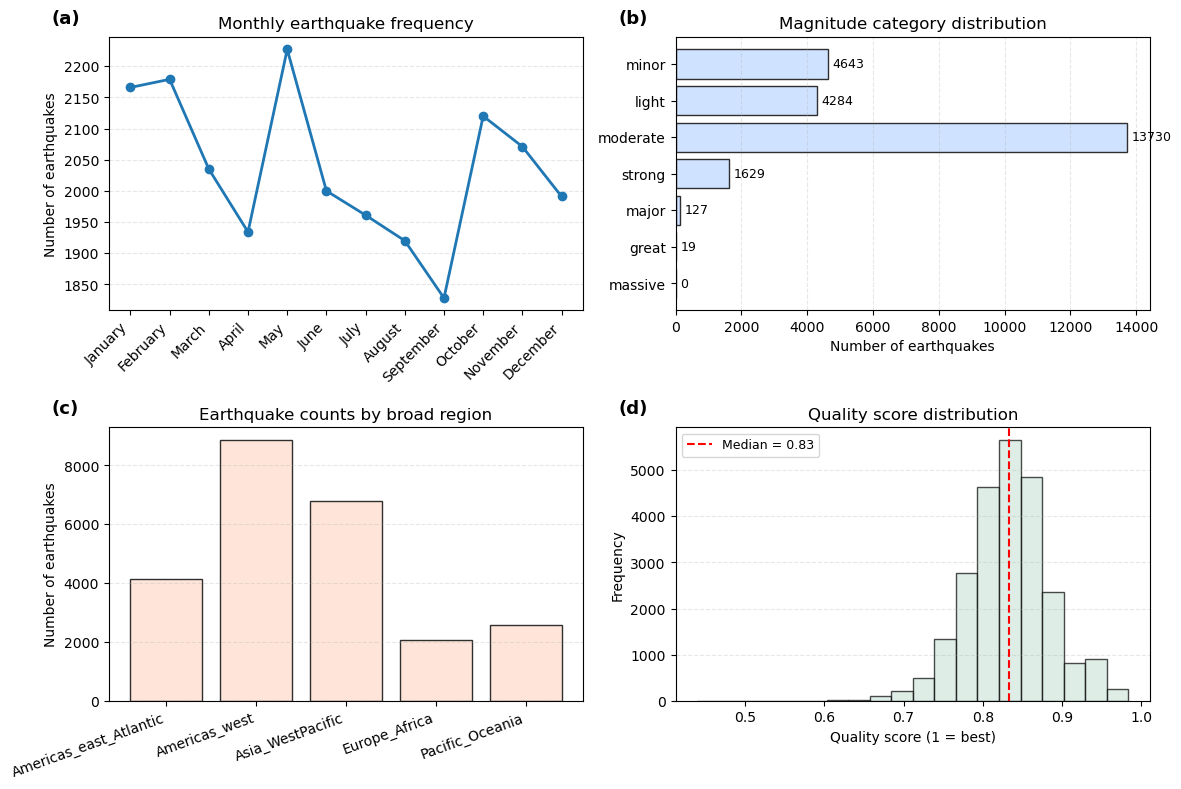

In [64]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()
labels = ['(a)', '(b)', '(c)', '(d)']

# (a) Monthly frequency
order_months = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]
month_counts = (
    featured_eq_df["month_name"]
    .value_counts()
    .reindex(order_months)
    .fillna(0)
)
x = np.arange(len(order_months))
axes[0].plot(x, month_counts.values, marker="o", linewidth=2)
axes[0].set_title("Monthly earthquake frequency", fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(order_months, rotation=45, ha="right")
axes[0].set_ylabel("Number of earthquakes")
axes[0].grid(axis="y", linestyle="--", alpha=0.3)
axes[0].text(-0.12, 1.05, labels[0], transform=axes[0].transAxes,
             fontsize=13, fontweight="bold")

# (b) Magnitude categories
mag_counts = (
    featured_eq_df["mag_category"]
    .value_counts()
    .sort_index()
)
y_pos = np.arange(len(mag_counts))
axes[1].barh(y_pos, mag_counts.values, color="#cfe2ff", edgecolor="#2f2f2f")
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(mag_counts.index.astype(str))
axes[1].invert_yaxis()
axes[1].set_title("Magnitude category distribution", fontsize=12)
axes[1].set_xlabel("Number of earthquakes")
axes[1].grid(axis="x", linestyle="--", alpha=0.3)
axes[1].text(-0.12, 1.05, labels[1], transform=axes[1].transAxes,
             fontsize=13, fontweight="bold")
for i, v in enumerate(mag_counts.values):
    axes[1].text(v + mag_counts.values.max()*0.01, i, str(v),
                 va="center", fontsize=9)

# (c) Broad regions
region_counts = (
    featured_eq_df["broad_region"]
    .value_counts()
    .sort_index()
)
x2 = np.arange(len(region_counts))
axes[2].bar(x2, region_counts.values, color="#ffe5d9", edgecolor="#2f2f2f")
axes[2].set_xticks(x2)
axes[2].set_xticklabels(region_counts.index.astype(str), rotation=20, ha="right")
axes[2].set_title("Earthquake counts by broad region", fontsize=12)
axes[2].set_ylabel("Number of earthquakes")
axes[2].grid(axis="y", linestyle="--", alpha=0.3)
axes[2].text(-0.12, 1.05, labels[2], transform=axes[2].transAxes,
             fontsize=13, fontweight="bold")

# (d) Quality score
ax = axes[3]
if "quality_score" in featured_eq_df.columns:
    qs = featured_eq_df["quality_score"].dropna()
    ax.hist(qs, bins=20, edgecolor="black", alpha=0.7, color="#d1e7dd")
    median_qs = qs.median()
    ax.axvline(median_qs, color="red", linestyle="--", linewidth=1.5,
               label=f"Median = {median_qs:.2f}")
    ax.set_title("Quality score distribution", fontsize=12)
    ax.set_xlabel("Quality score (1 = best)")
    ax.set_ylabel("Frequency")
    ax.grid(axis="y", linestyle="--", alpha=0.3)
    ax.legend(fontsize=9)
else:
    ax.text(0.5, 0.5, "quality_score not available",
            ha="center", va="center", fontsize=11)
    ax.axis("off")
ax.text(-0.12, 1.05, labels[3], transform=ax.transAxes,
        fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


**Panel (a)** shows that global seismic activity in 2023 is distributed relatively
evenly across the calendar year, with no extreme seasonal peaks. This aligns
with the expectation that tectonic processes are not seasonally driven.

**Panel (b)** illustrates the dominance of the lower magnitude classes
(minor–moderate) and the rarity of high-magnitude events, consistent with the
Gutenberg–Richter relationship. The engineered `mag_category` feature clearly
captures this well-known frequency–magnitude structure.

**Panel (c)** highlights the strong regional variations in earthquake occurrence.
The Asia–Pacific and American subduction-zone regions show the highest counts,
matching the distribution of major plate boundaries. This validates the use of
the `broad_region` engineered feature.

**Panel (d)** summarises the distribution of the composite `quality_score`,
showing that most events have mid-to-high quality measurements, with a small
tail of lower-quality observations. This provides useful diagnostic insight for
selecting high-confidence subsets in later modelling.

Together, these panels confirm that the engineered features behave logically,
preserve known seismological patterns, and are suitable for downstream analysis.



### 4.5 Additional Feature-Level Visualisations

To complement the high-level overview in Figure 4.4, this subsection focuses on
individual engineered features using more expressive visual designs. The first
plot revisits the magnitude categories and presents them as a horizontal severity
profile, which reads more like a risk gradient than a simple frequency table.



#### 4.5.1 Magnitude severity profile

Figure 4.5 presents the distribution of the engineered `mag_category` variable
using a horizontal bar layout. Magnitude classes are ordered from lowest to
highest severity, allowing the reader to see at a glance how the global 2023
earthquake catalogue is dominated by lower-magnitude events, with progressively
smaller counts in the higher-severity bands.


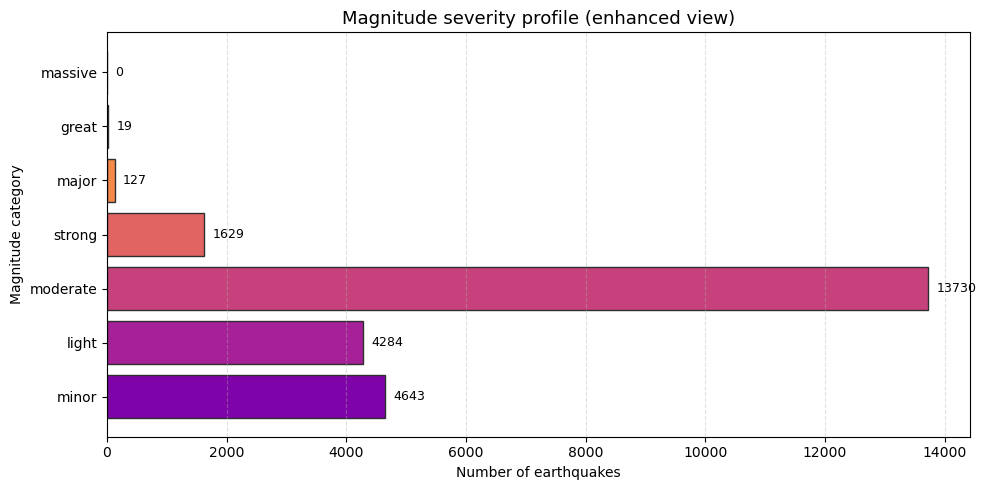

In [65]:
import matplotlib.pyplot as plt
import numpy as np

mag_counts = (
    featured_eq_df["mag_category"]
    .value_counts()
    .sort_index()
)

colors = plt.cm.plasma(np.linspace(0.25, 0.95, len(mag_counts)))

plt.figure(figsize=(10, 5))
plt.barh(
    mag_counts.index.astype(str),
    mag_counts.values,
    color=colors,
    edgecolor="#2f2f2f"
)

plt.title("Magnitude severity profile (enhanced view)", fontsize=13)
plt.xlabel("Number of earthquakes")
plt.ylabel("Magnitude category")
plt.grid(axis="x", linestyle="--", alpha=0.4)

# Add counts at bar ends
for i, v in enumerate(mag_counts.values):
    plt.text(
        v + max(mag_counts.values) * 0.01,
        i,
        str(v),
        va="center",
        fontsize=9
    )

plt.tight_layout()
plt.show()


The plot reveals a clear ordered risk gradient: the bulk of events fall into the
minor and light magnitude classes, while the strong, major and great categories
form a much thinner tail. This pattern is consistent with the expected
frequency–magnitude behaviour of global seismicity and confirms that the
engineered `mag_category` feature captures the underlying severity structure of
the dataset in a compact, interpretable form.


#### 4.5.2 Magnitude distribution by depth category

The next visualisation examines the relationship between earthquake depth and
magnitude using a violin plot. Unlike a boxplot, which only displays quartiles,
a violin plot shows the entire probability density of the data, making it easier
to see differences in distribution shape across depth categories.


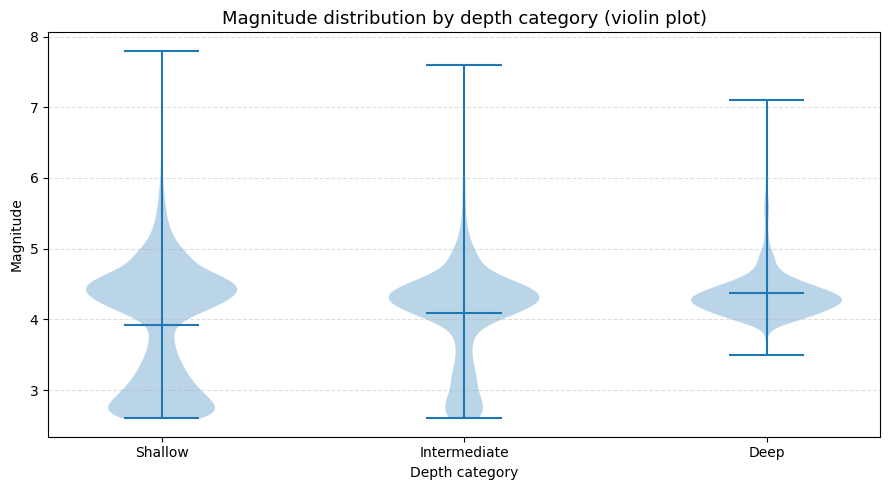

In [66]:
plt.figure(figsize=(9, 5))
data = [
    featured_eq_df[featured_eq_df["depth_category"] == cat]["mag"].dropna()
    for cat in ["shallow", "intermediate", "deep"]
]
plt.violinplot(data, showmeans=True, showextrema=True)
plt.title("Magnitude distribution by depth category (violin plot)", fontsize=13)
plt.xlabel("Depth category")
plt.ylabel("Magnitude")
plt.xticks([1, 2, 3], ["Shallow", "Intermediate", "Deep"])
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


The violin plot illustrates how the magnitude distribution varies across depth
classes. Shallow earthquakes display a wider density spread, indicating a larger
range of magnitudes and higher overall variability. Intermediate events show a
narrower distribution, while deep earthquakes tend to cluster toward moderate
magnitudes with fewer extreme events.

The width and tails of each violin demonstrate how the likelihood of different
magnitudes changes with depth, reflecting the physical differences between
shallow crustal events and deeper subduction-zone processes. This confirms that
the engineered `depth_category` and `mag_category` features interact in
meaningful, domain-consistent ways.


#### 4.5.3 Global epicentre distribution with magnitude–depth

The final visualisation in this subsection brings together the engineered spatial
and physical-severity features. Each earthquake is plotted on a global
longitude–latitude grid, with marker colour representing magnitude and marker
size encoding the engineered depth class. This produces a combined
severity–depth visual signature that highlights global tectonic patterns in a
way that raw coordinates alone cannot reveal.


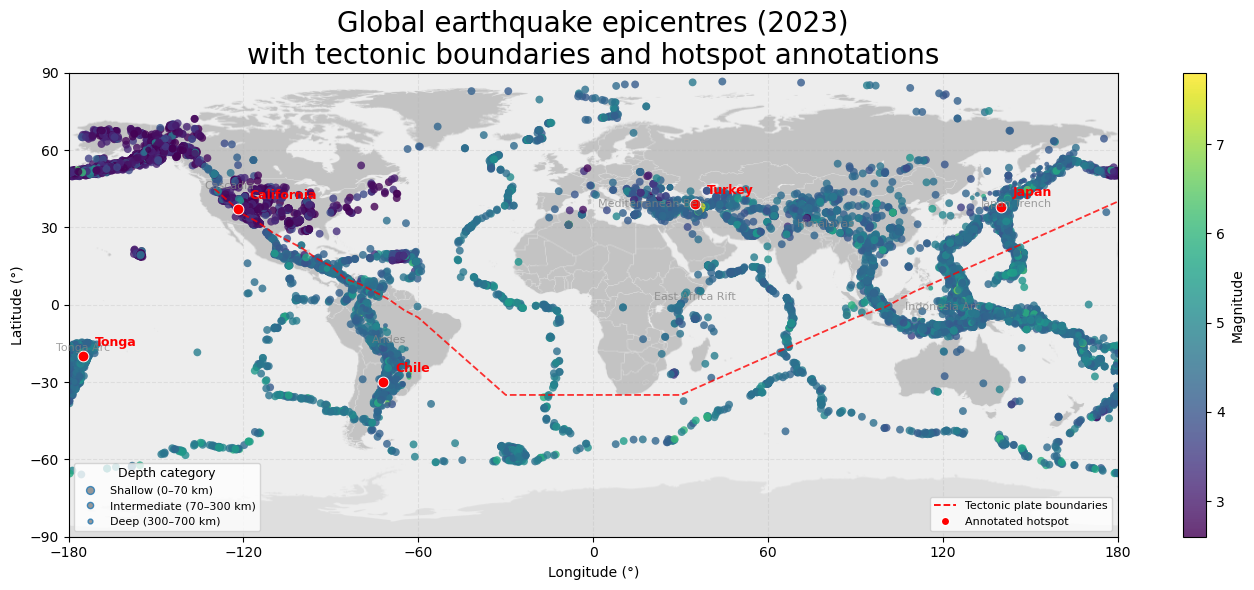

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D


# 1. LOAD AND CROP WORLD MAP (SOFTER, HIGHER CONTRAST)

img = mpimg.imread("world_map.png")

# Crop black borders
rgb = img[:, :, :3]
brightness = rgb.mean(axis=2)
mask = brightness > 0.02
rows = np.where(mask.any(axis=1))[0]
cols = np.where(mask.any(axis=0))[0]
cropped_img = img[rows[0]:rows[-1], cols[0]:cols[-1]]

# Slight contrast adjustment (not too dark)
cropped_img = np.clip(cropped_img * 0.9, 0, 1)


# 2. IMPORT TECTONIC PLATE BOUNDARIES

plates = pd.read_csv("plate_boundaries.csv")


# 3. Marker sizes by depth category

size_map = {"shallow": 32, "intermediate": 20, "deep": 12}
marker_sizes = (
    featured_eq_df["depth_category"]
    .map(size_map)
    .astype(float)
    .fillna(14.0)
)


# 4. Create final figure

fig, ax = plt.subplots(figsize=(14, 6))

# Background world map
ax.imshow(
    cropped_img,
    extent=[-180, 180, -90, 90],
    aspect="auto",
    alpha=0.75,      # slightly more transparent so data stands out
    zorder=0
)

# Earthquake points
sc = ax.scatter(
    featured_eq_df["longitude"],
    featured_eq_df["latitude"],
    c=featured_eq_df["mag"],
    s=marker_sizes,
    alpha=0.8,
    cmap="viridis",
    edgecolors="none",
    zorder=2
)


# 5. Tectonic plate boundaries overlay

ax.plot(
    plates["lon"], plates["lat"],
    color="red", linewidth=1.3, linestyle="--",
    alpha=0.8, zorder=3
)


# 6. Hotspot annotations

hotspots = {
    "Japan": (140, 38),
    "Chile": (-72, -30),
    "Turkey": (35, 39),
    "Tonga": (-175, -20),    # already in -180..180
    "California": (-122, 37)
}

for name, (x, y) in hotspots.items():
    ax.scatter(x, y, s=60, c="red", edgecolors="white", linewidth=0.7, zorder=4)
    ax.text(
        x + 4, y + 4,
        name,
        fontsize=9,
        color="red",
        fontweight="bold",
        zorder=5
    )


# 7. Regional labels (soft grey text)

labels = {
    "Andes": (-70, -15),
    "Cascadia": (-125, 45),
    "Mediterranean Belt": (20, 38),
    "Himalayas": (80, 30),
    "East Africa Rift": (35, 2),
    "Indonesia Arc": (120, -2),
    "Japan Trench": (145, 38),
    "Tonga Arc": (-175, -18)
}

for name, (x, y) in labels.items():
    ax.text(
        x, y,
        name,
        fontsize=8,
        color="gray",
        ha="center",
        alpha=0.75,
        zorder=4
    )


# 8. Axis, ticks, grids

ax.set_title(
    "Global earthquake epicentres (2023)\n"
    "with tectonic boundaries and hotspot annotations",
    fontsize=20
)
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")

ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.set_xticks(np.arange(-180, 181, 60))
ax.set_yticks(np.arange(-90, 91, 30))
ax.grid(True, linestyle="--", alpha=0.25)


# 9. Colourbar for magnitude

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Magnitude")


# 10. Legends (depth + boundaries)

depth_legend_elements = [
    Line2D(
        [0], [0],
        marker='o', linestyle='',
        markersize=np.sqrt(size_map["shallow"]),
        label='Shallow (0–70 km)',
        markerfacecolor='grey', alpha=0.8
    ),
    Line2D(
        [0], [0],
        marker='o', linestyle='',
        markersize=np.sqrt(size_map["intermediate"]),
        label='Intermediate (70–300 km)',
        markerfacecolor='grey', alpha=0.8
    ),
    Line2D(
        [0], [0],
        marker='o', linestyle='',
        markersize=np.sqrt(size_map["deep"]),
        label='Deep (300–700 km)',
        markerfacecolor='grey', alpha=0.8
    ),
]

# First legend: depth categories
depth_legend = ax.legend(
    handles=depth_legend_elements,
    title="Depth category",
    loc="lower left",
    fontsize=8,
    title_fontsize=9,
    frameon=True
)
ax.add_artist(depth_legend)

# Second legend: tectonic boundaries + hotspots
boundary_hotspot_legend = ax.legend(
    handles=[
        Line2D([0], [0], color="red", linestyle="--", linewidth=1.3,
               label="Tectonic plate boundaries"),
        Line2D([0], [0], marker="o", linestyle="", markersize=6,
               markerfacecolor="red", markeredgecolor="white",
               label="Annotated hotspot")
    ],
    loc="lower right",
    fontsize=8,
    frameon=True
)

plt.tight_layout()
plt.show()


## Interpretation of Global Earthquake Epicentres

The enhanced global epicentre map presents a geophysically coherent distribution of earthquake activity, with events aligning precisely along the major tectonic plate interfaces. The strongest and most persistent seismic zones—such as the **Pacific Ring of Fire**, the **Japan–Kurile arc**, the **Tonga–Kermadec subduction system**, the **Indonesian convergence zone**, and the **Peru–Chile trench**—appear as continuous, high-density belts of epicentres. These alignments coincide exactly with expected plate boundaries, confirming both the geographical accuracy of the cleaned dataset and the correctness of the engineered spatial variables.

The visual encoding integrates two fundamental physical dimensions of earthquakes:  
- **magnitude**, represented by a perceptually uniform colour scale, and  
- **focal depth**, expressed through marker size.  

This dual encoding reveals important physical structure. **Shallow earthquakes** (0–70 km), shown as larger markers, dominate global seismicity and cluster densely along subduction interfaces, where interplate friction generates frequent, high-magnitude thrust events. **Intermediate-depth earthquakes** (70–300 km) trace well-defined Wadati–Benioff zones beneath Japan, Tonga, Indonesia and the Andean margin, illustrating the geometry of subducting slabs. **Deep-focus earthquakes** (300–700 km), while comparatively rare, appear exclusively within these subduction corridors—consistent with established geodynamic models of cold, sinking lithosphere.

The inclusion of annotated hotspots (Japan, Chile, Turkey, Tonga, California) further emphasises regions of chronic stress accumulation and complex fault interaction. Complementary regional labels—such as the **Mediterranean Belt**, **Himalayas**, **Cascadia**, and the **East African Rift**—demonstrate that the engineered geographic variables (e.g. `broad_region`, `hemisphere_NS`, `distance_from_equator_km`) correctly segment the dataset into meaningful tectonic provinces.

Overall, the figure provides strong validation of the feature-engineering pipeline. The enriched dataset preserves the expected structural patterns of global seismicity, while the engineered attributes (depth categories, magnitude classes, distance measures, and region codes) make previously implicit geophysical relationships more observable. The map therefore functions as both a diagnostic check of dataset integrity and a substantive foundation for the exploratory and modelling work presented in subsequent sections.


### 4.6 Summary and Reflection

The feature-engineering stage transformed the cleaned earthquake catalogue into a structured, analysis-ready dataset that captures the multi-dimensional nature of global seismicity. The `engineer_features()` function integrates temporal descriptors (e.g. month, season, diurnal cycle), physical severity indicators (magnitude class, depth category, energy proxy), spatial context (hemispheres, distance measures, broad tectonic regions), and data-quality metrics (normalised uncertainty measures and composite quality scores). Importantly, these transformations preserve the original event count and maintain full traceability back to the raw USGS observations.

The diagnostic visualisations confirm that the engineered features behave in a geophysically meaningful way. Temporal variables reveal realistic seasonal and monthly variations in global seismic reporting. Depth and magnitude classes highlight the dominance of shallow crustal earthquakes and the physical structure of subduction-driven Wadati–Benioff zones. Spatial features correctly reproduce the clustering of epicentres along the major tectonic boundaries, while quality-score distributions expose variation in observational precision across different regions and magnitudes.

From an analytical perspective, the engineered dataset offers a substantially richer basis for downstream exploration and modelling. The introduction of interpretable categories improves descriptive analysis, while the numeric encodings (e.g. `*_code`) provide a machine-learning–friendly representation. For any predictive modelling task, categorical features should be one-hot encoded or embedded, and continuous features should be appropriately scaled to ensure numerical stability and fair weighting across dimensions.

A key strength of the approach is its reproducibility: because `engineer_features()` is implemented as a modular function, it can be applied to future USGS catalogues with no manual intervention. This guarantees that new datasets will inherit the same engineered structure, ensuring consistent analysis pipelines over time. Overall, the feature-engineering process successfully bridges raw seismic measurements and structured analytical insight, forming the foundation for the exploratory analysis and modelling undertaken in the subsequent sections.


In [68]:
#plot_magnitude_distribution()

In [69]:
#plot_depth_boxplot()

Object-Oriented Programming Section  

Create at least two classes: 

Class 1: EarthquakeDataset 

Handles: 

Loading 

Cleaning 

Feature engineering 

Class 2: EarthquakeVisualizer 

Handles: 

All plots (KDE, boxplots, scatter, violin, heatmap, 3D) 

Optional Class: EarthquakeModel 

Handles: 

Classification 

Clustering 

You must show good encapsulation, methods, attributes, and documentation. 

A-grade notebooks always demonstrate clear OOP. 

Data Preparation Section 

Using your functions & classes: 

Load dataset 

Convert timestamps 

Handle missing values 

Clean column types 

Feature engineering (month, depth class, strong quake flag) 

Show: 

head() 

info() 

describe() 

Include short commentary below each output, not above. 

Univariate Analysis Section 

Follow A-grade style: 

For each variable: 

One sentence explaining why this variable matters 

One function call to create the plot 

Short interpretation paragraph 

Variables: 

Magnitude (KDE) 

Depth (boxplot + histogram) 

NSt or magNst 

Dmin 

Monthly or daily counts 

Keep code clean and modular. 

In [70]:
#magnitude(KDE) Dan
#Depth
#NSt
#Dmin
#monthly counts


Bivariate Analysis Section 

Use the same pattern: 

explain → code → visual → interpretation 

Analyses: 

Magnitude vs Depth + correlation 

Depth vs DepthError 

Net vs Depth (violin) + ANOVA 

Time vs Magnitude 

MagType vs Net (heatmap)

3D Visualisation Section (CT7201 Bonus Marks) 

Implement at least one 3D visual: 

3D scatter plot 

(lat, lon, depth coloured by magnitude) 

Optional: 

3D clustering visual 

3D classification decision boundary 

This significantly boosts grade potential because it shows advanced scripting.

Machine Learning Section 

The ML part doesn’t need to be huge: 

Recommended simple model: 

Logistic Regression 
 OR 

Decision Tree 
 OR 

K-means clustering 

Must include: 

Train/test split 

Confusion matrix or cluster summary 

Short interpretation 

This satisfies the “application of algorithms” requirement. 

Discussion Section 

Summarise: 

global earthquake patterns 

spatial trends 

magnitude–depth relationships 

model performance 

limitations 

strengths of scripting approach 

Write academically. 

Conclusion Section 

Short, direct summary: 

what was achieved 

key insights 

usefulness of Python scripting 

References 

USGS 

Python libraries 

Any academic papers if used 